# Final Big Data Project - Annie
# PySpark

In [0]:
import urllib.request

urllib.request.urlretrieve("https://www.gutenberg.org/files/2003/2003.txt", "/tmp/nod-new.txt")
dbutils.fs.mv("file:/tmp/nod-new.txt","dbfs:/data/nod-new.txt")


Out[14]: True

In [0]:
nServers=6
nodRDD=sc.textFile("dbfs:/data/nod-new.txt", nServers)

In [0]:
# flatmap() eaxh line to words
wordsRDD = nodRDD.flatMap(lambda line: line.strip().split(" "))


In [0]:
import re
from pyspark.ml.feature import StopWordsRemover

cleanRDD = wordsRDD.map(lambda w1: re.sub(r'[^A-Za-z]', '', w1))
remover = StopWordsRemover()
stopwords = remover.getStopWords()
newRDD = cleanRDD.filter(lambda word: word not in stopwords)

In [0]:
 finalRDD = newRDD.filter(lambda x: x != "")

In [0]:
# map() to intermediate key-value pairs (word, 1) 

IKVPairsRDD = finalRDD.map(lambda word: (word,1))

In [0]:
# reduceByKey() to eord, count (word, sum)
resultsRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)
print("Reduced key values: ", resultsRDD)
# collect() back into Python DS
results =  resultsRDD.collect()
print("Collections: ", results)

Reduced key values: PythonRDD[22] at RDD at PythonRDD.scala:58
Collections: [('Project', 83), ('C', 7), ('anywhere', 2), ('whatsoever', 2), ('away', 20), ('Date', 2), ('Character', 1), ('OF', 11), ('GUTENBERG', 3), ('BONDAGE', 3), ('Hesitation', 2), ('love', 11), ('book', 3), ('Collected', 1), ('It', 10), ('published', 1), ('copyright', 13), ('period', 1), ('beauty', 6), ('Greeves', 1), ('malevolent', 1), ('God', 24), ('questions', 1), ('Lord', 7), ('position', 1), ('perhaps', 1), ('father', 1), ('know', 28), ('blaspheme', 1), ('Christian', 2), ('stage', 1), ('plays', 1), ('portray', 1), ('issues', 1), ('faced', 1), ('sunset', 2), ('Chaunted', 1), ('Sang', 3), ('maiden', 4), ('Brethon', 1), ('glory', 3), ('enterprise', 1), ('unknown', 4), ('breezes', 3), ('scarlet', 1), ('full', 14), ('uncharted', 1), ('seen', 15), ('Satan', 2), ('Nature', 3), ('ye', 4), ('flower', 3), ('battles', 3), ('filth', 2), ('falling', 4), ('thwart', 1), ('follows', 1), ('sun', 10), ('Long', 2), ('even', 8), ('Drinks', 1), ('streak', 1), ('run', 6), ('right', 6), ('Lo', 2), ('Across', 3), ('surely', 2), ('harbour', 1), ('fancy', 2), ('Once', 1), ('dream', 7), ('nearer', 2), ('What', 9), ('throats', 1), ('III', 2), ('When', 11), ('riches', 2), ('fling', 2), ('meadows', 3), ('valleys', 5), ('ocean', 6), ('kin', 1), ('rallies', 1), ('music', 4), ('dreadful', 1), ('brow', 2), ('beneath', 11), ('high', 7), ('two', 1), ('hair', 4), ('But', 28), ('Seeingstay', 1), ('Victory', 1), ('Cuchulains', 1), ('rust', 1), ('lips', 4), ('breasts', 1), ('Dryads', 1), ('blows', 1), ('Avalon', 1), ('ancient', 6), ('brass', 1), ('spirit', 7), ('striving', 2), ('Now', 7), ('shout', 1), ('like', 4), ('stricken', 1), ('head', 12), ('become', 1), ('Irish', 1), ('weedy', 2), ('strand', 2), ('fills', 1), ('shape', 1), ('thanes', 1), ('wintry', 3), ('used', 5), ('hang', 1), ('fog', 2), ('ever', 14), ('Lonely', 1), ('deed', 1), ('Unto', 2), ('beloved', 3), ('drenching', 1), ('rain', 3), ('Or', 15), ('came', 5), ('amid', 5), ('shining', 2), ('ask', 2), ('lighten', 1), ('Go', 1), ('Green', 1), ('praises', 1), ('virgin', 1), ('labour', 3), ('underneath', 3), ('East', 1), ('Thou', 8), ('fastclosed', 1), ('teeth', 1), ('hate', 10), ('Body', 1), ('beyond', 18), ('upward', 2), ('easily', 2), ('forgather', 1), ('Its', 4), ('lifted', 1), ('wherewith', 3), ('Him', 2), ('race', 2), ('sound', 6), ('ill', 2), ('weariness', 2), ('soothe', 1), ('tumults', 1), ('tender', 1), ('unsubstantial', 1), ('fluttering', 2), ('rim', 1), ('untrammelled', 1), ('fleet', 1), ('rein', 1), ('fires', 1), ('swiftly', 1), ('kind', 4), ('bind', 1), ('careful', 1), ('slumber', 3), ('creep', 1), ('boughs', 2), ('placed', 1), ('altar', 1), ('praise', 3), ('flowers', 5), ('deadening', 1), ('hours', 4), ('wove', 1), ('send', 2), ('oblivion', 1), ('meets', 1), ('path', 1), ('fall', 4), ('shed', 1), ('let', 3), ('hast', 2), ('Knowledge', 1), ('Gross', 1), ('falls', 2), ('earthly', 1), ('Singing', 5), ('smite', 1), ('strength', 2), ('rebel', 1), ('looking', 1), ('mercy', 1), ('change', 2), ('relentless', 1), ('slay', 2), ('Material', 1), ('signs', 1), ('arrayed', 1), ('disobey', 1), ('Dreams', 2), ('live', 6), ('Steal', 1), ('Whither', 2), ('mammoth', 1), ('creature', 1), ('Witch', 1), ('Theyve', 2), ('led', 1), ('sorceress', 1), ('Than', 2), ('distress', 3), ('winner', 1), ('shade', 2), ('ragged', 2), ('form', 7), ('eve', 1), ('chase', 1), ('quarrys', 1), ('bishops', 2), ('water', 2), ('burning', 2), ('Too', 2), ('Her', 1), ('meditation', 1), ('Things', 1), ('Starry', 1), ('holiness', 1), ('loved', 3), ('told', 2), ('Alone', 3), ('sinners', 1), ('pile', 1), ('mob', 1), ('curls', 1), ('must', 13), ('grievous', 1), ('weighs', 1), ('nightmare', 1), ('always', 2), ('Seeing', 2), ('blinding', 1), ('gold', 3), ('swim', 1), ('vision', 1), ('One', 3), ('bear', 1), ('trials', 1), ('cruelties', 1), ('knowledge', 1), ('surer', 1), ('bittersweet', 1), ('elder', 1), ('Slackens', 1), ('lawn', 5), ('dew', 3), ('Such', 1), ('seer', 1), ('lu

In [0]:
# displaying only 10 word count

results10 = resultsRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(results10)

[(186, 'And'), (129, 'I'), (98, 'The'), (83, 'Project'), (55, 'Gutenbergtm'), (48, 'work'), (45, 'To'), (41, 'In'), (35, 'works'), (35, 'Of')]

Out[33]:

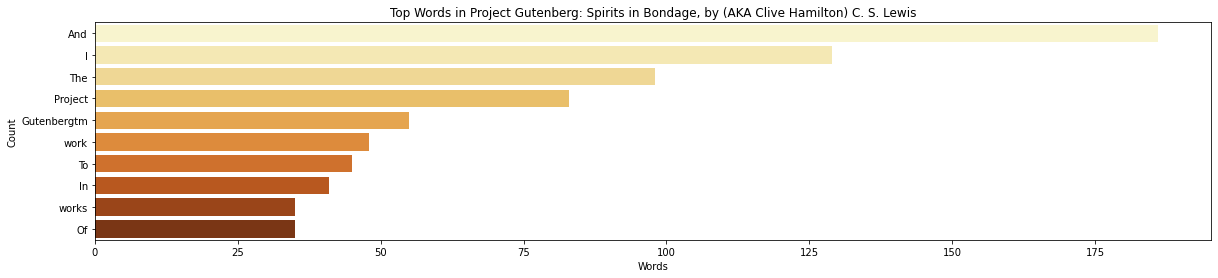

Text(0.5, 1.0, 'Top Words in Project Gutenberg: Spirits in Bondage, by (AKA Clive Hamilton) C. S. Lewis')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source = 'Project Gutenberg: Spirits in Bondage, by (AKA Clive Hamilton) C. S. Lewis'

title = 'Top Words in ' + source
xlabel = 'Words'
ylabel = 'Count'

df = pd.DataFrame.from_records(results10, columns =[xlabel, ylabel]) 
plt.figure(figsize=(20,4))
sns.barplot(xlabel, ylabel, data=df, palette="YlOrBr").set_title(title)